In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
dna = md.load('./1bna.pdb')

In [ ]:
grooves = mdna.GrooveAnalysis(dna)

/Users/thor/surfdrive/Projects/pymdna/pymdna/analysis.py:168: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(groove, axis=0)
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


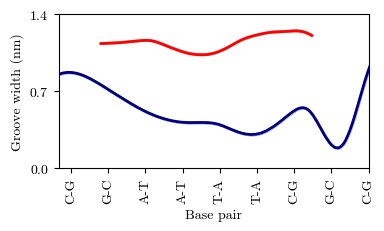

In [6]:
fig,ax = plt.subplots(figsize=[4,2])
grooves.plot_groove_widths(ax=ax,lw=2,c_major='red',c_minor='navy')
ax.set_ylim(0,1.4)
ax.set_yticks([0,0.7,1.4])
ax.set_xlim(60,40*9)
ax.set_xlabel('Base pair',fontsize=10)
ax.set_ylabel('Groove width (nm)',fontsize=10)
fig.savefig('groove_widths_1bna.png',dpi=300,bbox_inches='tight')

Text(0.5, -0.05, 'DNA base pair')

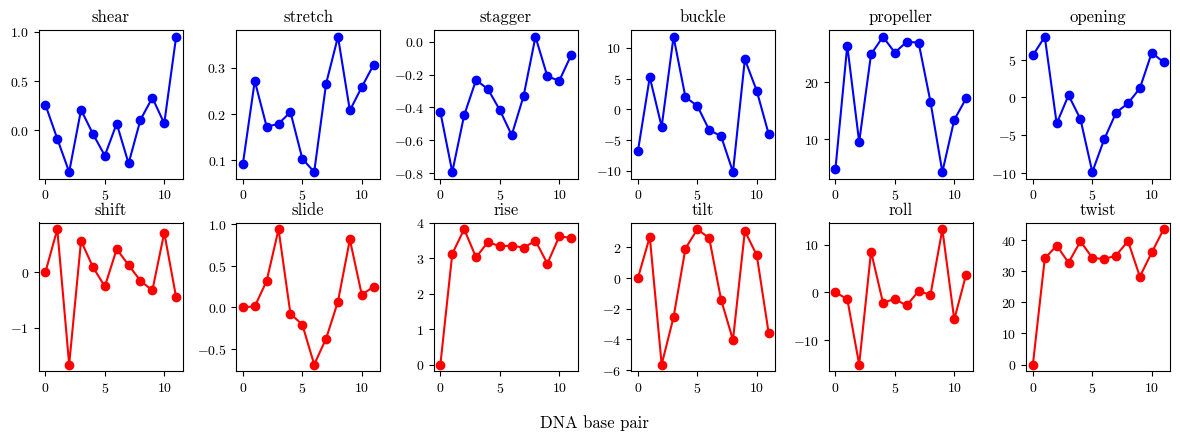

In [3]:
# Confidence intervals 
from scipy.stats import t

rigid = mdna.NucleicFrames(dna)
params, names = rigid.get_paramters()

fig, ax = plt.subplots(2,6,figsize=(12,4))
fig.tight_layout()
ax = ax.flatten()
M = np.mean(params, axis=0)
S = np.std(params, axis=0)
n = params.shape[0]
ci = t.ppf(0.975, df=n-1) * S / np.sqrt(n)
x = np.arange(0, params.shape[1])
for _, i in enumerate(M.T):
    if _ >= 6:
        c1, c2 = 'red','coral'
    else:
        c1, c2 = 'blue','cornflowerblue'
    ax[_].plot(i[::-1], '-o',color=c1)
    ax[_].fill_between(x, (i-ci[_])[::-1], (i+ci[_])[::-1], color=c2, alpha=0.2)
    ax[_].set_title(names[_])

fig.supxlabel('DNA base pair',y=-0.05)

In [4]:
import numpy as np

def compute_total_curvature(twist_params, tilt_params, roll_params):
    # Calculate W values as the sum of twist_params up to each index
    # In this case, Wn = sum of twist_params[:n+1]
    W = np.cumsum(twist_params[:9])  # Only need up to twist9 based on Curvature calculations
    
    # Calculate Curvature1 using the formula provided
    Curvature1 = sum(np.cos(W[i]) * tilt_params[i] + np.sin(W[i]) * roll_params[i] for i in range(len(W)))
    
    # Calculate Curvature2 using the formula provided
    Curvature2 = sum(np.cos(W[i]) * roll_params[i] - np.sin(W[i]) * tilt_params[i] for i in range(len(W)))
    
    # Calculate total curvature
    CurvTot = np.sqrt(Curvature1**2 + Curvature2**2)
    
    return CurvTot

# # Assuming par.twistN, par.tiltN, and par.rollN are given as lists or arrays
# # For example:
# twist_params = np.array([twist0, twist1, twist2, twist3, twist4, twist5, twist6, twist7, twist8, twist9, twist10])
# tilt_params = np.array([tilt1, tilt2, tilt3, tilt4, tilt5, tilt6, tilt7, tilt8, tilt9])
# roll_params = np.array([roll1, roll2, roll3, roll4, roll5, roll6, roll7, roll8, roll9])

# # Compute the total curvature
# CurvTot = compute_total_curvature(twist_params, tilt_params, roll_params)
# print(f'Total Curvature: {CurvTot}')


In [5]:
frames = rigid.mean_reference_frames
frames.shape
# select only origin 
origins = frames[:,:,0].swapaxes(0,1)[0]
origins.shape

(12, 3)

(-1.1904140551884965,
 4.087788446744282,
 -0.4239452918370561,
 4.854257210095723,
 -1.1231598138809202,
 2.835492062568664)

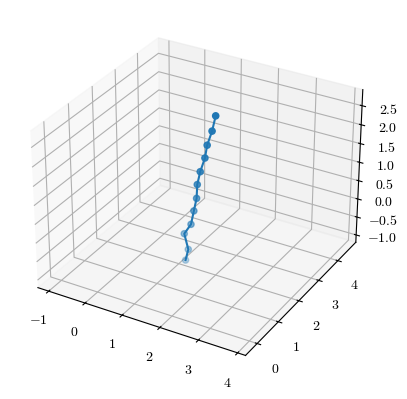

In [6]:
# plot origns in 3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*origins.T)
ax.plot(*origins.T)
ax.axis('equal')

In [7]:
params

array([[[ 9.47221404e-01,  3.06250085e-01, -8.24097683e-02,
         -3.99535375e+00,  1.70962259e+01,  4.67832425e+00,
         -4.49934176e-01,  2.46281458e-01,  3.57173506e+00,
         -3.57527274e+00,  3.73414228e+00,  4.35707720e+01],
        [ 6.69172054e-02,  2.58038587e-01, -2.37984279e-01,
          3.00855779e+00,  1.33424468e+01,  5.92964496e+00,
          7.12476772e-01,  1.51250087e-01,  3.61286096e+00,
          1.49959745e+00, -5.67073295e+00,  3.60910417e+01],
        [ 3.27688649e-01,  2.07481698e-01, -2.10726005e-01,
          8.11729026e+00,  4.19065273e+00,  1.22197358e+00,
         -3.26917694e-01,  8.17221428e-01,  2.84588364e+00,
          3.07378478e+00,  1.32131468e+01,  2.83120806e+01],
        [ 1.04421971e-01,  3.66699117e-01,  2.99561340e-02,
         -1.01941582e+01,  1.64978857e+01, -7.71390219e-01,
         -1.53867430e-01,  6.86165595e-02,  3.48891555e+00,
         -4.04355169e+00, -5.16314347e-01,  3.97612699e+01],
        [-3.39368854e-01,  2.6529319

(12,) [2.72066872 0.8218436  1.43697401 1.8460975  2.95134142 1.94670665
 0.94992971 3.0880737  1.76787989 4.79422406 1.54554104 7.90151138]


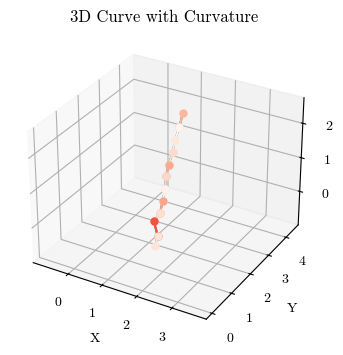

In [8]:
# compute curvature of origins 
import numpy as np

def compute_curvature(points):
    # Calculate first derivatives
    d_points = np.gradient(points, axis=0)
    
    # Compute unit tangent (T) and its derivative (T') (fist and second derivatives of points, respectively)
    T = d_points / np.linalg.norm(d_points, axis=1)[:, np.newaxis]
    dT = np.gradient(T, axis=0)
    
    # Compute curvature
    curvature = np.linalg.norm(np.cross(dT, T), axis=1) / np.linalg.norm(d_points, axis=1)**3
    
    return curvature, T, dT

origins = frames[:,:,0].swapaxes(0,1)[0]
curvature, T, dT = compute_curvature(origins)
print(curvature.shape, curvature)


# plot origns in 3D 
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*origins.T)
ax.plot(*origins.T)
ax.axis('equal')
# Color the curve by curvature
norm = plt.Normalize(curvature.min(), curvature.max())
colors = plt.cm.Reds(norm(curvature))
for i in range(len(origins)-1):
    ax.plot(origins[i:i+2, 0], origins[i:i+2, 1], origins[i:i+2, 2], color=colors[i], marker='o', markersize=5)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
# plt.colorbar(sm, label='Curvature')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Curve with Curvature')

plt.show()

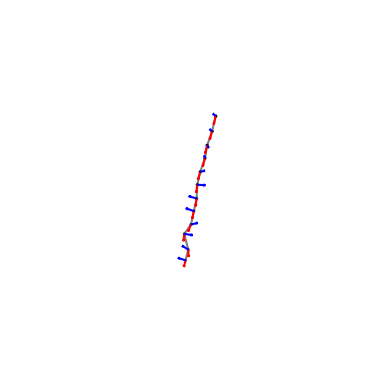

In [16]:

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*origins.T, c='k',s=2)
ax.quiver(*origins.T, *T.T,length=0.2,color='red')
ax.quiver(*origins.T, *dT.T,length=0.2,color='blue',normalize=True)
ax.plot(*origins.T,c='gray')
ax.axis('equal')

# Remove axis labels and grid
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.grid(False)
ax.axis('off')


# Make the panes transparent
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# Optionally, also remove the gridlines and border
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


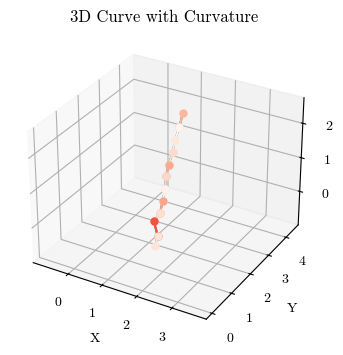

In [10]:

# plot origns in 3D 
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*origins.T)
ax.plot(*origins.T)
ax.axis('equal')
# Color the curve by curvature
norm = plt.Normalize(curvature.min(), curvature.max())
colors = plt.cm.Reds(norm(curvature))
for i in range(len(origins)-1):
    ax.plot(origins[i:i+2, 0], origins[i:i+2, 1], origins[i:i+2, 2], color=colors[i], marker='o', markersize=5)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
# plt.colorbar(sm, label='Curvature')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Curve with Curvature')

plt.show()

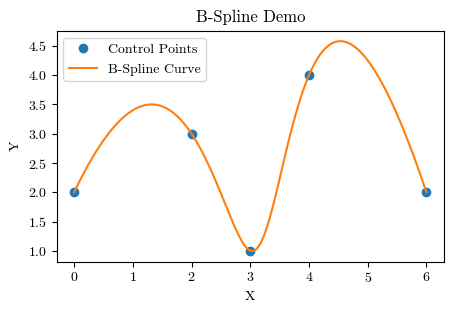

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Step 1: Define control points
control_points = np.array([
    [0, 2],
    [2, 3],
    [3, 1],
    [4, 4],
    [6, 2]
])
x, y = control_points.T

# Step 2: Generate the B-spline representation
tck, u = splprep([x, y], s=0)

# Step 3: Evaluate the B-spline over a fine grid
u_fine = np.linspace(0, 1, 100)
x_fine, y_fine = splev(u_fine, tck)

# Step 4: Plot the original control points and the B-spline
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'o', label='Control Points')
plt.plot(x_fine, y_fine, '-', label='B-Spline Curve')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('B-Spline Demo')
plt.show()


12.337408385949134


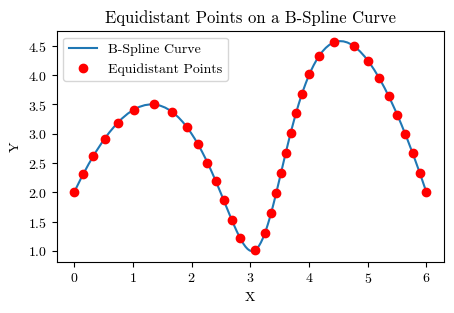

In [12]:
from scipy.integrate import quad
from scipy.optimize import brentq

# Step 1: Compute the derivative of the B-spline
tckp, _ = splprep([x, y], s=0, k=3, per=0) # ensure same parameters as original spline
derivative = lambda t: splev(t, tckp, der=1) # function to compute derivative

# Step 2: Define a function to compute speed at a given t
speed_func = lambda t: np.sqrt(sum(np.square(derivative(t))))

# Step 3: Integrate the speed to find total arc length
total_arc_length, _ = quad(speed_func, 0, 1)

print(total_arc_length)

# Step 4: Function to find parameter t for a given arc length
def find_t_for_arc_length(s, total_s):
    # s is the desired arc length
    # total_s is the total arc length of the curve
    arc_length_func = lambda t: quad(speed_func, 0, t)[0] - s
    t, _ = brentq(arc_length_func, 0, 1, full_output=True)
    return t

# Example: Distribute 10 equidistant points along the spline
num_points = int(total_arc_length/0.34)
equidistant_points = np.linspace(0, total_arc_length, num_points)
t_values = [find_t_for_arc_length(s, total_arc_length) for s in equidistant_points]

# Evaluate the spline at these t values to get equidistant points
equidistant_x, equidistant_y = splev(t_values, tck)

# Plot the results
plt.figure(figsize=(5, 3))
plt.plot(x_fine, y_fine, '-', label='B-Spline Curve')
plt.plot(equidistant_x, equidistant_y, 'ro', label='Equidistant Points')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equidistant Points on a B-Spline Curve')
plt.show()


[(0.0, 0.5019607843137255, 0.0), (0.0784313725490196, 0.5184313725490196, 0.1858823529411765), (0.1568627450980392, 0.5349019607843137, 0.371764705882353), (0.23529411764705882, 0.5513725490196079, 0.5576470588235294), (0.3137254901960784, 0.567843137254902, 0.743529411764706), (0.39215686274509803, 0.5843137254901961, 0.9294117647058824)]


Text(0, 0.5, 'Curvature $[1/nm]$')

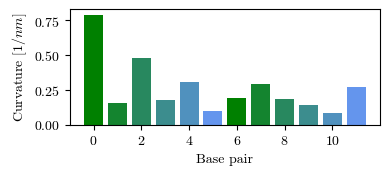

In [72]:
import seaborn as sns
# colors = sns.color_palette('BuGr',len(curvature))
cmap = sns.blend_palette(('green','cornflowerblue'))
print(cmap)
colors = sns.color_palette(cmap,len(curvature))
fig, ax = plt.subplots(figsize=[4,1.5])
ax.bar(x=range(len(curvature)),height=curvature/10, color=colors)
#ax.bar(x=range(len(k.T[0])),height=k.T[0]*10, color='k',width=0.1)
ax.set_xlabel('Base pair')
ax.set_ylabel('Curvature $[1/nm]$')

In [73]:
curvature

array([7.90151138, 1.54554104, 4.79422406, 1.76787989, 3.0880737 ,
       0.94992971, 1.94670665, 2.95134142, 1.8460975 , 1.43697401,
       0.8218436 , 2.72066872])